In [69]:
pip install swat

     |████████████████████████████████| 456 kB 1.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [48]:
import swat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline

In [51]:
t_sne_data=pd.read_csv('csv/t-SNE_data_from_paper.csv')
t_sne_data


,Compound ID,tSNE-1,tSNE-2
0,BRD-K32273377-001-14-6,-0.369542,9.718216
1,BRD-K51207550-001-20-6,-0.902436,17.167963
2,BRD-K14116214-001-07-0,-0.790806,-10.659140
3,BRD-A60177051-001-01-6,-2.159382,-6.720759
4,BRD-K87492696-001-14-0,0.283137,7.094828
...,...,...,...
2910,BRD-K95785537-001-21-5,0.765038,1.258732
2911,BRD-K49657628-001-12-2,0.100436,9.362219
2912,BRD-K76064317-001-06-5,1.534748,15.552460
2913,BRD-A89175223-051-12-2,0.999264,3.791481


In [38]:
compound_stem=[]
for string in t_sne_data['Compound ID']:
    if '-' in string:
        compound_stem.append(string.split('-')[1])
    else:
        compound_stem.append(string)



In [52]:
compound_stem

['K32273377',
 'K51207550',
 'K14116214',
 'A60177051',
 'K87492696',
 'A74980173',
 'K11196887',
 'K14705039',
 'K76534306',
 'A93964801',
 'K66615216',
 'K87202646',
 'K28494619',
 'K71125014',
 'K31682896',
 'K08525451',
 'K50859149',
 'K55250441',
 'A75850590',
 'K49668410',
 'K55034111',
 'A78049876',
 'K51677086',
 'K93524252',
 'A24397426',
 'K10196357',
 'K37753391',
 'K45916615',
 'K61717546',
 'A47790386',
 'K11630072',
 'K24844714',
 'K13086613',
 'K88492762',
 'K06934249',
 'A88358860',
 'K53540417',
 'A97316251',
 'K25182024',
 'A92801646',
 'K28003251',
 'K45584528',
 'K14748922',
 'K80087380',
 'K53100515',
 'A24490366',
 'K81486165',
 'K91654532',
 'K94517866',
 'K18354977',
 'A29033948',
 'A66769347',
 'K46262419',
 'A68890226',
 'K25297725',
 'K47565979',
 'A35156362',
 'K92583280',
 'K90202961',
 'K91302016',
 'K19788520',
 'K40202248',
 'K72406519',
 'K56316015',
 'K06095669',
 'A45241570',
 'K87123083',
 'K94178265',
 'K23205642',
 'K48781323',
 'K21353513',
 'K776

In [53]:
t_sne_data.insert(1, "compound_stem", compound_stem)


In [54]:
t_sne_data

,Compound ID,compound_stem,tSNE-1,tSNE-2
0,BRD-K32273377-001-14-6,K32273377,-0.369542,9.718216
1,BRD-K51207550-001-20-6,K51207550,-0.902436,17.167963
2,BRD-K14116214-001-07-0,K14116214,-0.790806,-10.659140
3,BRD-A60177051-001-01-6,A60177051,-2.159382,-6.720759
4,BRD-K87492696-001-14-0,K87492696,0.283137,7.094828
...,...,...,...,...
2910,BRD-K95785537-001-21-5,K95785537,0.765038,1.258732
2911,BRD-K49657628-001-12-2,K49657628,0.100436,9.362219
2912,BRD-K76064317-001-06-5,K76064317,1.534748,15.552460
2913,BRD-A89175223-051-12-2,A89175223,0.999264,3.791481


In [74]:
compound_target=pd.read_csv('csv/inhibitor_target_from_paper.csv')
new_compound_target=compound_target.rename(columns={'Broad ID': 'compound_stem'})
new_compound_target

,compound_stem,Compound,Target
0,A22740840,oxytetracycline,30S ribosome 16S rRNA decoding
1,K31484631,rifabutin (mycobutin),DNA-dependent RNA polymerase
2,K28346421,rifapentine (priftin),DNA-dependent RNA polymerase
3,K28667793,pyrazinamide,trans-translation
4,K32273377,sulfadiazine,dihydropteroate synthase
...,...,...,...
97,K71106091,fludarabine phosphate,nucleoside reductase
98,K23544418,mls000679378,DNA-dependent RNA polymerase
99,K92093830,doxorubicin,intercalator
100,K24844714,5-fluorouracil,5-FU


In [75]:
left=new_compound_target.set_index(['compound_stem'])
right=t_sne_data.set_index(['compound_stem'])
full=right.join(left)
full


,Compound ID,tSNE-1,tSNE-2,Compound,Target
compound_stem,,,,,
A00113255,BRD-A00113255-001-01-8,2.631453,16.199276,NaN,NaN
A00412054,BRD-A00412054-001-01-7,1.567066,3.267457,NaN,NaN
A00546892,BRD-A00546892-003-04-8,7.605811,-2.189907,NaN,NaN
A00578795,BRD-A00578795-001-02-7,-0.461087,2.658628,NaN,NaN
A00827783,BRD-A00827783-001-21-2,0.015422,11.260672,NaN,NaN
...,...,...,...,...,...
M94983326,BRD-M94983326-238-01-0,0.945481,14.579424,NaN,NaN
U14272896,BRD-U14272896-000-01-9,2.067212,-1.241667,NaN,NaN
U21835532,BRD-U21835532-000-01-4,2.264847,11.520016,NaN,NaN


In [81]:
reduced_full= full.loc[full.Target.notnull()]

In [83]:
reduced_full.to_csv('csv/compound_tSNE1_tSNE2_target.csv')
reduced_full.to_excel('excel/compound_tSNE1_tSNE2_target.xlsx')

In [77]:
reduced_full

,Compound ID,tSNE-1,tSNE-2,Compound,Target
compound_stem,,,,,
A11132253,BRD-A11132253-001-07-4,-1.562503,7.963621,beta-nad,nucleoside reductase
A24397426,BRD-A24397426-001-08-8,1.387824,-19.010340,nadifloxacin,DNA gyrase
A47790386,BRD-A47790386-001-01-0,2.976226,-19.428172,balofloxacin,DNA gyrase
A60177051,BRD-A60177051-001-01-6,-2.159382,-6.720759,erythromycin,50S ribosome 23S rRNA translocation
A62036252,BRD-A62036252-001-01-9,-2.434684,-6.983488,83905-01-5,50S ribosome 23S rRNA translocation
A74980173,BRD-A74980173-001-10-1,2.945656,-19.427996,gatifloxacin,DNA gyrase
A75850590,BRD-A75850590-003-08-0,-2.121088,-16.378923,lomefloxacin,DNA gyrase
A78049876,BRD-A78049876-003-01-6,-4.482302,-4.847901,clindamycin,50S ribosome 23S rRNA translocation
A93964801,BRD-A93964801-001-13-6,2.435365,-19.117079,clinafloxacin,DNA gyrase


In [85]:
reduced_full.shape

(46, 5)

In [87]:
DNA_gyrase=reduced_full.loc[reduced_full.Target=='DNA gyrase']
DNA_gyrase

,Compound ID,tSNE-1,tSNE-2,Compound,Target
compound_stem,,,,,
A24397426,BRD-A24397426-001-08-8,1.387824,-19.010340,nadifloxacin,DNA gyrase
A47790386,BRD-A47790386-001-01-0,2.976226,-19.428172,balofloxacin,DNA gyrase
A74980173,BRD-A74980173-001-10-1,2.945656,-19.427996,gatifloxacin,DNA gyrase
A75850590,BRD-A75850590-003-08-0,-2.121088,-16.378923,lomefloxacin,DNA gyrase
A93964801,BRD-A93964801-001-13-6,2.435365,-19.117079,clinafloxacin,DNA gyrase
K08525451,BRD-K08525451-003-04-5,-2.240831,-15.895746,sarafloxacin,DNA gyrase
K10196357,BRD-K10196357-003-01-2,1.989634,-19.350600,besifloxacin,DNA gyrase
K11196887,BRD-K11196887-001-19-6,-2.048940,-16.016527,norfloxacin,DNA gyrase
K26260697,BRD-K26260697-001-09-4,1.551856,-18.255456,n-acetyl ciprofloxacin,DNA gyrase


In [88]:
DHPS=reduced_full.loc[reduced_full.Target=='dihydropteroate synthase']
DHPS

,Compound ID,tSNE-1,tSNE-2,Compound,Target
compound_stem,,,,,
K11640013,BRD-K11640013-001-12-5,2.408725,14.858751,sulfamethazine,dihydropteroate synthase
K14116214,BRD-K14116214-001-07-0,-0.790806,-10.659140,sulfamonomethoxine,dihydropteroate synthase
K14705039,BRD-K14705039-001-14-9,-4.876038,11.132812,sulfathiazole,dihydropteroate synthase
K28494619,BRD-K28494619-001-23-3,0.981466,7.487319,sulfamethoxazole,dihydropteroate synthase
K31682896,BRD-K31682896-001-21-6,2.086090,16.935910,sulfamethizole,dihydropteroate synthase
K32273377,BRD-K32273377-001-14-6,-0.369542,9.718216,sulfadiazine,dihydropteroate synthase
K50859149,BRD-K50859149-001-16-1,-2.773009,7.022830,sulfisoxazole,dihydropteroate synthase
K55250441,BRD-K55250441-001-11-4,-2.499366,6.252131,sulfadoxine,dihydropteroate synthase
K67264507,BRD-K67264507-001-06-2,-4.899123,11.097907,ac1mgphm,dihydropteroate synthase


In [66]:
_50S_ribosome=full.loc[full.classifier_target=='50S ribosome 23S rRNA translocation']
_50S_ribosome

,Compound ID,tSNE-1,tSNE-2,compound_name,classifier_target
compound_stem,,,,,
A60177051,BRD-A60177051-001-01-6,-2.159382,-6.720759,Erythromycin,50S ribosome 23S rRNA translocation
A78049876,BRD-A78049876-003-01-6,-4.482302,-4.847901,clindamycin,50S ribosome 23S rRNA translocation
K37753391,BRD-K37753391-046-01-6,-1.752040,-6.489774,Tylosin,50S ribosome 23S rRNA translocation
K49668410,BRD-K49668410-001-15-4,2.703806,-11.834887,clarithromycin,50S ribosome 23S rRNA translocation
K51677086,BRD-K51677086-001-11-2,-2.114465,-6.792958,erythromycin ethylsuccinate,50S ribosome 23S rRNA translocation


In [89]:
_5_FU=reduced_full.loc[reduced_full.Target=='5-FU']
_5_FU

,Compound ID,tSNE-1,tSNE-2,Compound,Target
compound_stem,,,,,
K11630072,BRD-K11630072-001-10-8,1.558112,-14.513164,carmofur,5-FU
K24844714,BRD-K24844714-001-20-3,-2.362966,-14.144470,5-fluorouracil,5-FU
K56397775,BRD-K56397775-001-01-9,1.593007,-14.928030,"1(2h)-pyrimidinecarboxamide, 5-fluoro-3,4-dihy...",5-FU


In [90]:
inhA=reduced_full.loc[reduced_full.Target=='inhA']
inhA

,Compound ID,tSNE-1,tSNE-2,Compound,Target
compound_stem,,,,,
K38633957,BRD-K38633957-001-01-0,3.023598,-18.495745,nsc690248,inhA
K50585630,BRD-K50585630-001-02-8,2.957704,-18.560043,ac1ntyan,inhA
K51207550,BRD-K51207550-001-20-6,-0.902436,17.167963,ethionamide,inhA
K80390541,BRD-K80390541-001-02-5,2.899926,-18.535543,ac1nvnp3,inhA
K87202646,BRD-K87202646-001-28-4,3.117346,-18.398433,isoniazid,inhA
K98427564,BRD-K98427564-001-07-6,3.019176,-18.595701,zinc00219235,inhA


In [94]:
nucleoside_reductase=reduced_full.loc[reduced_full.Target=='nucleoside reductase']
nucleoside_reductase

,Compound ID,tSNE-1,tSNE-2,Compound,Target
compound_stem,,,,,
A11132253,BRD-A11132253-001-07-4,-1.562503,7.963621,beta-nad,nucleoside reductase
K79612754,BRD-K79612754-001-17-5,-0.761344,15.289316,inosine,nucleoside reductase


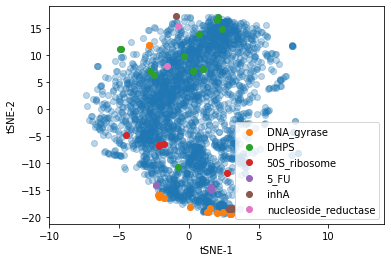

In [95]:
X=t_sne_data['tSNE-1']
y=t_sne_data['tSNE-2']
plt.scatter(X,y,alpha=0.3)

plt.scatter(DNA_gyrase['tSNE-1'], DNA_gyrase['tSNE-2'],label='DNA_gyrase')

plt.scatter(DHPS['tSNE-1'], DHPS['tSNE-2'],label='DHPS')
plt.scatter(_50S_ribosome['tSNE-1'], _50S_ribosome['tSNE-2'],label='50S_ribosome')
plt.scatter(_5_FU['tSNE-1'], _5_FU['tSNE-2'],label='5_FU')
plt.scatter(inhA['tSNE-1'], inhA['tSNE-2'],label='inhA')
plt.scatter(nucleoside_reductase['tSNE-1'], nucleoside_reductase['tSNE-2'],label='nucleoside_reductase') 
plt.xlim((-10, 14)) 
plt.legend()

plt.xlabel('tSNE-1')
plt.ylabel('tSNE-2')
plt.savefig('picture/tSNE_reproduce.png')